<h1 align=center><font size = 6>Telkom Assignment 3</font></h1>



<p><b>Prepared by</b> : Dyah Diwasasri Ratnaningtyas <br>
<b>Last Updated</b> : 3 January 2021 <br>
    <b>Description</b> : This project considered as Telkom Assignment 3 of Hacktiv8 Introduction to Python for Data Science Batch 47. The aim of this project is to introduce the data visualization with Python as concrete and as consistent as possible. The dataset that will be used is Training Feedback Data 2020 from Telkom Data Bay. The result of this project is for training purpose only.</p>

# 1. Data PreProcessing

In [55]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import six
from io import StringIO

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

import scipy.stats as stats
import random
import warnings

%matplotlib inline

In [2]:
#Fetching CSV data from dataset folder
training = pd.read_csv('./dataset/Feedback_Lat_2020.csv')

In [3]:
#View the top 5 rows of the dataset using the head() function
training.head(5)

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
0,Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Programmer Development Course Amoeba,80114271,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Business Analytics Amoeba,80114280,LAT,Video Learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Online UX Design Course Amoeba,80114281,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Displaying data types for getting basic information about this dataframe
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nama Pelatihan                     1581 non-null   object 
 1   Objid Pelatihan                    1581 non-null   int64  
 2   Category                           1581 non-null   object 
 3   Tipe                               895 non-null    object 
 4   Lokasi Pelatihan                   1447 non-null   object 
 5   Provider                           1480 non-null   object 
 6   Academy Event                      1459 non-null   object 
 7   Location                           1514 non-null   object 
 8   Provider Category                  1239 non-null   object 
 9   Event Type                         1526 non-null   object 
 10  Status                             1519 non-null   object 
 11  Tgl Mulai                          1581 non-null   objec

In [5]:
#Showing basics statistic of data
training.describe()

,Objid Pelatihan,JML Peserta,JML Confirmed,JML Peserta Hadir,JML UBPP Inst,JML UBPP Delivery,UBPP Inst,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
count,1.581000e+03,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1539.000000,1581.000000,1581.000000,1581.0,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,8.279691e+07,32.163188,18.940544,23.476913,9.270715,12.886148,41.624997,27.296420,51.224092,0.0,52.388545,27.168355,52.532796,39.369564,50.628419,52.671012,52.279791
std,4.399535e+06,94.044293,64.475255,61.810226,20.698898,28.014751,41.650135,38.448665,43.125272,0.0,43.819904,38.381787,43.979533,40.709386,42.685038,44.111036,43.769020
min,8.011078e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000
25%,8.011266e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.011346e+07,9.000000,3.000000,5.000000,1.000000,2.000000,61.670000,0.000000,80.000000,0.0,83.330000,0.000000,83.630000,42.860000,77.780000,83.750000,83.250000
75%,9.000375e+07,29.000000,21.000000,25.000000,13.000000,16.000000,82.915000,71.980000,89.090000,0.0,90.000000,70.710000,90.100000,75.000000,88.330000,90.000000,90.000000
max,9.000456e+07,1576.000000,1209.000000,790.000000,336.000000,343.000000,100.000000,100.000000,100.000000,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
#Copy data
training_data = training.copy()

In [7]:
#Drop column that will not be used in this project
training_data.drop(['Tipe'], inplace=True, axis=1)

In [8]:
#Manipulating columns by renaming column name
training_data = training_data.rename(
    columns={"Nama Pelatihan" : "training_name", 
             "Objid Pelatihan" : "objid",
             "Category" : "category",
             "Lokasi Pelatihan" : "city",
             "Provider" : "provider",
             "Provider Category" : "provider_category",
             "Academy Event" : "academy",
             "Location" : "location",
             "Event Type" : "training_type",
             "Status" : "status",
             "Tgl Mulai" : "start_date",
             "Tgl Selesai" : "end_date",
             "JML Peserta" : "total_participant",
             "JML Confirmed" : "total_confirmed",
             "JML Peserta Hadir" : "total_attendance",
             "JML UBPP Inst" : "total_feed_instructor",
             "JML UBPP Delivery" : "total_feed_delivery",
             "UBPP Inst" : "feed_instructor",
             "UBPP Akom" : "feed_acomodation",
             "UBPP Sarana" : "feed_facility",
             "UBPP Laborat" : "feed_lab",
             "UBPP Penyelenggaraan" : "feed_delivery",
             "UBPP Kafetaria" : "feed_cafe",
             "UBPP Materi" : "feed_material",
             "Net Promotor Score" : "nps",
             "Customer Satisfaction" : "cs",
             "First Response & Average Handling" : "frah",
             "Customer Effort Score" : "ces"           
             }
)

In [9]:
#View the top 5 rows of the dataset using the head() function
training_data.head(5)

,training_name,objid,category,city,provider,academy,location,provider_category,training_type,status,...,feed_acomodation,feed_facility,feed_lab,feed_delivery,feed_cafe,feed_material,nps,cs,frah,ces
0,Social Media Ads & Analytic,80114181,LAT,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,On Going,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CISM,80114269,LAT,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,On Going,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Programmer Development Course Amoeba,80114271,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Business Analytics Amoeba,80114280,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Online UX Design Course Amoeba,80114281,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Fill missing value in column feed_instructor with data mean
training_data['feed_instructor'].fillna((training_data['feed_instructor'].mean()), inplace=True)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   training_name          1581 non-null   object 
 1   objid                  1581 non-null   int64  
 2   category               1581 non-null   object 
 3   city                   1447 non-null   object 
 4   provider               1480 non-null   object 
 5   academy                1459 non-null   object 
 6   location               1514 non-null   object 
 7   provider_category      1239 non-null   object 
 8   training_type          1526 non-null   object 
 9   status                 1519 non-null   object 
 10  start_date             1581 non-null   object 
 11  end_date               1581 non-null   object 
 12  total_participant      1581 non-null   int64  
 13  total_confirmed        1581 non-null   int64  
 14  total_attendance       1581 non-null   int64  
 15  tota

In [11]:
#Remove missing values
training_data = training_data.dropna()
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 1569
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   training_name          1170 non-null   object 
 1   objid                  1170 non-null   int64  
 2   category               1170 non-null   object 
 3   city                   1170 non-null   object 
 4   provider               1170 non-null   object 
 5   academy                1170 non-null   object 
 6   location               1170 non-null   object 
 7   provider_category      1170 non-null   object 
 8   training_type          1170 non-null   object 
 9   status                 1170 non-null   object 
 10  start_date             1170 non-null   object 
 11  end_date               1170 non-null   object 
 12  total_participant      1170 non-null   int64  
 13  total_confirmed        1170 non-null   int64  
 14  total_attendance       1170 non-null   int64  
 15  tota

In [12]:
#Specifying data types
training_data['start_date'] = pd.to_datetime(training_data['start_date'])
training_data['end_date'] = pd.to_datetime(training_data['end_date'])
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 1569
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   training_name          1170 non-null   object        
 1   objid                  1170 non-null   int64         
 2   category               1170 non-null   object        
 3   city                   1170 non-null   object        
 4   provider               1170 non-null   object        
 5   academy                1170 non-null   object        
 6   location               1170 non-null   object        
 7   provider_category      1170 non-null   object        
 8   training_type          1170 non-null   object        
 9   status                 1170 non-null   object        
 10  start_date             1170 non-null   datetime64[ns]
 11  end_date               1170 non-null   datetime64[ns]
 12  total_participant      1170 non-null   int64         
 13  tot

In [13]:
training_data.isnull().sum()

training_name            0
objid                    0
category                 0
city                     0
provider                 0
academy                  0
location                 0
provider_category        0
training_type            0
status                   0
start_date               0
end_date                 0
total_participant        0
total_confirmed          0
total_attendance         0
total_feed_instructor    0
total_feed_delivery      0
feed_instructor          0
feed_acomodation         0
feed_facility            0
feed_lab                 0
feed_delivery            0
feed_cafe                0
feed_material            0
nps                      0
cs                       0
frah                     0
ces                      0
dtype: int64

In [14]:
#create a new column named nps_category and fill it with blank first
training_data['nps_category'] = ''

In [15]:
#create a list of our condition of NPS category as stated before with +40 as the standard
conditions = [
    (training_data['nps'] < 40),
    (training_data['nps'] >= 40)
]

#create a list of values we want to assign for each condition, this list is flexible to extend
values = ['Under 40', 'Above 40']

#use np.select to assign values to it using our list as arguments
training_data['nps_category'] = np.select(conditions, values)

#display updated DataFrame
training_data.head()

,training_name,objid,category,city,provider,academy,location,provider_category,training_type,status,...,feed_facility,feed_lab,feed_delivery,feed_cafe,feed_material,nps,cs,frah,ces,nps_category
0,Social Media Ads & Analytic,80114181,LAT,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,On Going,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Under 40
2,Programmer Development Course Amoeba,80114271,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Under 40
3,Business Analytics Amoeba,80114280,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Under 40
4,Online UX Design Course Amoeba,80114281,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Under 40
6,Proposal Business AM Telkom Infra,80114266,LAT,Bandung,Learning Area 4 Semarang,WS & INTERNATIONAL,Online (Lokasi Masing-Masing),Internal,Internal,On Going,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Under 40


# 2. Visualization

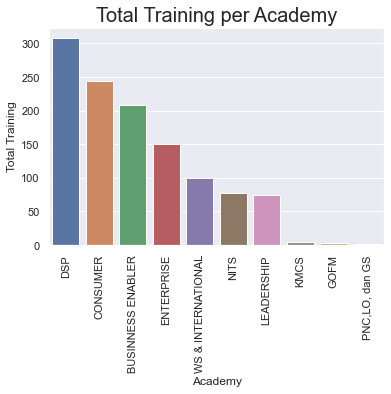

In [17]:
#Visualize the total training per Academy
sns.barplot(x=training_data['academy'].value_counts().index, y=training_data['academy'].value_counts().values)
plt.xlabel('Academy')
plt.ylabel('Total Training')
plt.title('Total Training per Academy',fontsize=20)
plt.xticks(rotation=90)
plt.show()

**Insight :**


    -Academy DSP has the most delivered Training in 2020
    -Meanwhile Mobile Academy has the least Training in 2020

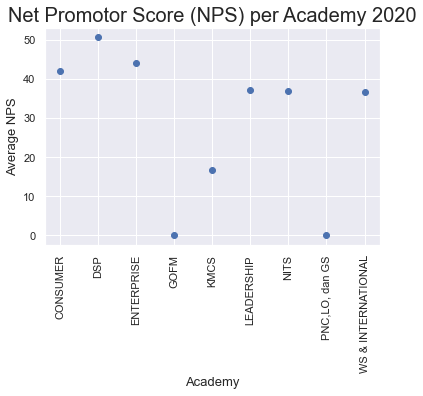

In [18]:
#Visualize the average NPS in each Academy
fig, ax = plt.subplots()
ax.scatter(x = training_data.groupby('academy')['nps'].mean()[1:].index, y = training_data.groupby('academy')['nps'].mean()[1:].values)
plt.ylabel('Average NPS', fontsize=13)
plt.xlabel('Academy', fontsize=13)
plt.title('Net Promotor Score (NPS) per Academy 2020', fontsize=20)
plt.xticks(rotation=90)
plt.show()

**Insight :**


    -Training held Academy have almost the same NPS with the range 30 - 55
    -Traiing held by Functional Unit (GOFM, KMCS, MOBILE, PNC) not having any value in NPS

# 3. Model Deployment

In [19]:
#initialize label encode
object_cols = ['category', 'city', 'academy','training_type','provider_category','nps_category']

label_encoder = LabelEncoder()
for col in object_cols:
    training_data[col] = label_encoder.fit_transform(training_data[col])
training_data.head()

,training_name,objid,category,city,provider,academy,location,provider_category,training_type,status,...,feed_facility,feed_lab,feed_delivery,feed_cafe,feed_material,nps,cs,frah,ces,nps_category
0,Social Media Ads & Analytic,80114181,0,3,Learning Area 2 Jakarta,1,Online (Lokasi Masing-Masing),1,0,On Going,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Programmer Development Course Amoeba,80114271,0,3,Learning Area 7 Makassar,2,Online (Lokasi Masing-Masing),1,0,WO,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Business Analytics Amoeba,80114280,0,3,Learning Area 7 Makassar,2,Online (Lokasi Masing-Masing),1,0,WO,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Online UX Design Course Amoeba,80114281,0,3,Learning Area 7 Makassar,2,Online (Lokasi Masing-Masing),1,0,WO,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,Proposal Business AM Telkom Infra,80114266,0,3,Learning Area 4 Semarang,9,Online (Lokasi Masing-Masing),1,0,On Going,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [20]:
#Defining features that will be used in model definition
features = ['category', 'city', 'academy','training_type','provider_category']

x = training_data[features]
y = training_data['nps_category']

Next step is spliting the data into two cluster : training set and test set randomly. I will use training set to train the model follows by evaluating its performance with test set. Thus, we will use train_test_split() with composition is 70% training set and 30% test set.

In [22]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

The model that will be used in this project are :
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. K-Nearest Neighbors
5. Support Vector Machine
6. Naive Bayes

All model will be resulting : **accuracy score** and **confusion matrix**

## 3.1 Decision Tree

In [39]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix :", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8433048433048433
Confusion Matrix : [[191  12]
 [ 43 105]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       203
           1       0.90      0.71      0.79       148

    accuracy                           0.84       351
   macro avg       0.86      0.83      0.83       351
weighted avg       0.85      0.84      0.84       351



## 3.2 Random Forest

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix :", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8433048433048433
Confusion Matrix : [[191  12]
 [ 43 105]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       203
           1       0.90      0.71      0.79       148

    accuracy                           0.84       351
   macro avg       0.86      0.83      0.83       351
weighted avg       0.85      0.84      0.84       351



## 3.3 Logistic Regression

In [37]:
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(x_train, y_train)

y_pred = LogR.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix :", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8262108262108262
Confusion Matrix : [[200   3]
 [ 58  90]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       203
           1       0.97      0.61      0.75       148

    accuracy                           0.83       351
   macro avg       0.87      0.80      0.81       351
weighted avg       0.86      0.83      0.82       351



## 3.4 K-Nearest Neighbors

In [36]:
kNN=KNeighborsClassifier()
kNN.fit(x_train,y_train)

y_pred = kNN.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix :", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8176638176638177
Confusion Matrix : [[177  26]
 [ 38 110]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       203
           1       0.81      0.74      0.77       148

    accuracy                           0.82       351
   macro avg       0.82      0.81      0.81       351
weighted avg       0.82      0.82      0.82       351



## 3.5 Support Vector Machine

In [53]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [54]:
y_pred=svm_model.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix :", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8262108262108262
Confusion Matrix : [[200   3]
 [ 58  90]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       203
           1       0.97      0.61      0.75       148

    accuracy                           0.83       351
   macro avg       0.87      0.80      0.81       351
weighted avg       0.86      0.83      0.82       351



## 3.6 Naive Bayes

In [52]:
nb=GaussianNB()
nb.fit(x_train,y_train)

y_pred=nb.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix :", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8062678062678063
Confusion Matrix : [[184  19]
 [ 49  99]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       203
           1       0.84      0.67      0.74       148

    accuracy                           0.81       351
   macro avg       0.81      0.79      0.79       351
weighted avg       0.81      0.81      0.80       351



# 4. Analysis

Based on all model above, we will choose model with highest accuracy : Decision Tree and Random Forest with accuracy : 0.8433048433048433